In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
import random

In [1]:
from keras.models import model_from_json

In [2]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [3]:
img_loc = "/Users/maverick/Downloads/images_handheld/"
labels = ['Sick','Healthy']
img_size = 224 # reshape the images to be square

In [4]:
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [5]:
train = get_data(img_loc + "Train")
val = get_data(img_loc + "Test")

<AxesSubplot:ylabel='count'>

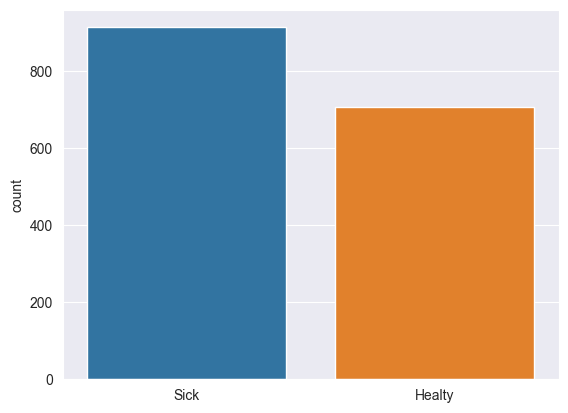

In [25]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Sick")
    else:
        l.append("Healthy")
sns.set_style('darkgrid')
sns.countplot(x=l)

Text(0.5, 1.0, 'Sick')

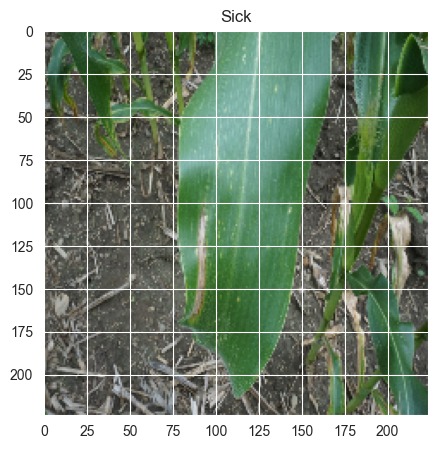

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Healthy')

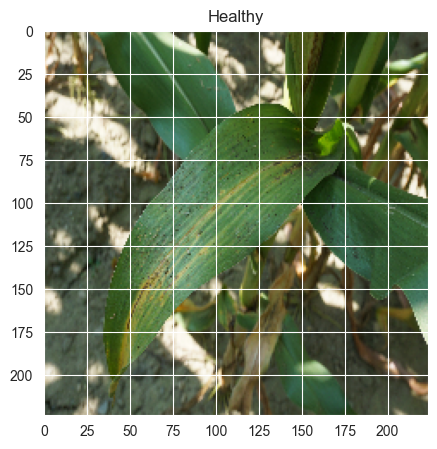

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [9]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [11]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(img_size,img_size,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

2022-10-06 22:32:23.637836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [28]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500
51/51 [==============================] - 23s 400ms/step - loss: 1.2278 - accuracy: 0.4382 - val_loss: 1.1724 - val_accuracy: 0.3550
Epoch 2/500
51/51 [==============================] - 19s 377ms/step - loss: 1.2264 - accuracy: 0.4333 - val_loss: 1.1567 - val_accuracy: 0.3550
Epoch 3/500
51/51 [==============================] - 22s 428ms/step - loss: 1.1699 - accuracy: 0.4617 - val_loss: 1.1422 - val_accuracy: 0.3491
Epoch 4/500
51/51 [==============================] - 20s 402ms/step - loss: 1.1660 - accuracy: 0.4444 - val_loss: 1.1280 - val_accuracy: 0.3550
Epoch 5/500
51/51 [==============================] - 21s 405ms/step - loss: 1.1726 - accuracy: 0.4487 - val_loss: 1.1144 - val_accuracy: 0.3609
Epoch 6/500
51/51 [==============================] - 19s 376ms/step - loss: 1.1367 - accuracy: 0.4382 - val_loss: 1.1011 - val_accuracy: 0.3609
Epoch 7/500
51/51 [==============================] - 20s 387ms/step - loss: 1.1314 - accuracy: 0.4530 - val_loss: 1.0886 - val_accuracy:

51/51 [==============================] - 17s 341ms/step - loss: 0.8263 - accuracy: 0.5445 - val_loss: 0.8004 - val_accuracy: 0.4970
Epoch 114/500
51/51 [==============================] - 17s 338ms/step - loss: 0.8496 - accuracy: 0.5204 - val_loss: 0.7999 - val_accuracy: 0.4970
Epoch 115/500
51/51 [==============================] - 18s 361ms/step - loss: 0.8421 - accuracy: 0.5229 - val_loss: 0.7993 - val_accuracy: 0.4970
Epoch 116/500
51/51 [==============================] - 18s 357ms/step - loss: 0.8368 - accuracy: 0.5247 - val_loss: 0.7989 - val_accuracy: 0.4970
Epoch 117/500
51/51 [==============================] - 18s 357ms/step - loss: 0.8363 - accuracy: 0.5155 - val_loss: 0.7984 - val_accuracy: 0.4970
Epoch 118/500
51/51 [==============================] - 18s 353ms/step - loss: 0.8405 - accuracy: 0.5235 - val_loss: 0.7979 - val_accuracy: 0.5030
Epoch 119/500
51/51 [==============================] - 17s 340ms/step - loss: 0.8393 - accuracy: 0.5284 - val_loss: 0.7974 - val_accuracy:

51/51 [==============================] - 18s 351ms/step - loss: 0.7521 - accuracy: 0.5773 - val_loss: 0.7623 - val_accuracy: 0.5089
Epoch 226/500
51/51 [==============================] - 18s 354ms/step - loss: 0.7505 - accuracy: 0.5748 - val_loss: 0.7621 - val_accuracy: 0.5089
Epoch 227/500
51/51 [==============================] - 18s 350ms/step - loss: 0.7609 - accuracy: 0.5779 - val_loss: 0.7619 - val_accuracy: 0.5089
Epoch 228/500
51/51 [==============================] - 18s 348ms/step - loss: 0.7472 - accuracy: 0.5958 - val_loss: 0.7616 - val_accuracy: 0.5089
Epoch 229/500
51/51 [==============================] - 18s 344ms/step - loss: 0.7801 - accuracy: 0.5803 - val_loss: 0.7614 - val_accuracy: 0.5089
Epoch 230/500
51/51 [==============================] - 18s 361ms/step - loss: 0.7277 - accuracy: 0.6044 - val_loss: 0.7612 - val_accuracy: 0.5089
Epoch 231/500
51/51 [==============================] - 18s 363ms/step - loss: 0.7295 - accuracy: 0.5921 - val_loss: 0.7610 - val_accuracy:

51/51 [==============================] - 17s 328ms/step - loss: 0.7128 - accuracy: 0.6038 - val_loss: 0.7437 - val_accuracy: 0.5325
Epoch 338/500
51/51 [==============================] - 18s 348ms/step - loss: 0.7017 - accuracy: 0.6057 - val_loss: 0.7436 - val_accuracy: 0.5325
Epoch 339/500
51/51 [==============================] - 17s 335ms/step - loss: 0.6684 - accuracy: 0.6329 - val_loss: 0.7435 - val_accuracy: 0.5325
Epoch 340/500
51/51 [==============================] - 17s 328ms/step - loss: 0.6882 - accuracy: 0.6354 - val_loss: 0.7433 - val_accuracy: 0.5325
Epoch 341/500
51/51 [==============================] - 17s 325ms/step - loss: 0.6746 - accuracy: 0.6273 - val_loss: 0.7432 - val_accuracy: 0.5385
Epoch 342/500
51/51 [==============================] - 17s 328ms/step - loss: 0.6908 - accuracy: 0.6230 - val_loss: 0.7430 - val_accuracy: 0.5385
Epoch 343/500
51/51 [==============================] - 17s 325ms/step - loss: 0.6904 - accuracy: 0.6261 - val_loss: 0.7430 - val_accuracy:

51/51 [==============================] - 18s 351ms/step - loss: 0.6315 - accuracy: 0.6718 - val_loss: 0.7346 - val_accuracy: 0.5503
Epoch 450/500
51/51 [==============================] - 18s 357ms/step - loss: 0.6444 - accuracy: 0.6570 - val_loss: 0.7346 - val_accuracy: 0.5503
Epoch 451/500
51/51 [==============================] - 18s 349ms/step - loss: 0.6614 - accuracy: 0.6341 - val_loss: 0.7343 - val_accuracy: 0.5503
Epoch 452/500
51/51 [==============================] - 18s 351ms/step - loss: 0.6509 - accuracy: 0.6576 - val_loss: 0.7343 - val_accuracy: 0.5503
Epoch 453/500
51/51 [==============================] - 18s 350ms/step - loss: 0.6430 - accuracy: 0.6607 - val_loss: 0.7342 - val_accuracy: 0.5503
Epoch 454/500
51/51 [==============================] - 18s 349ms/step - loss: 0.6484 - accuracy: 0.6588 - val_loss: 0.7343 - val_accuracy: 0.5503
Epoch 455/500
51/51 [==============================] - 18s 354ms/step - loss: 0.6386 - accuracy: 0.6638 - val_loss: 0.7342 - val_accuracy:

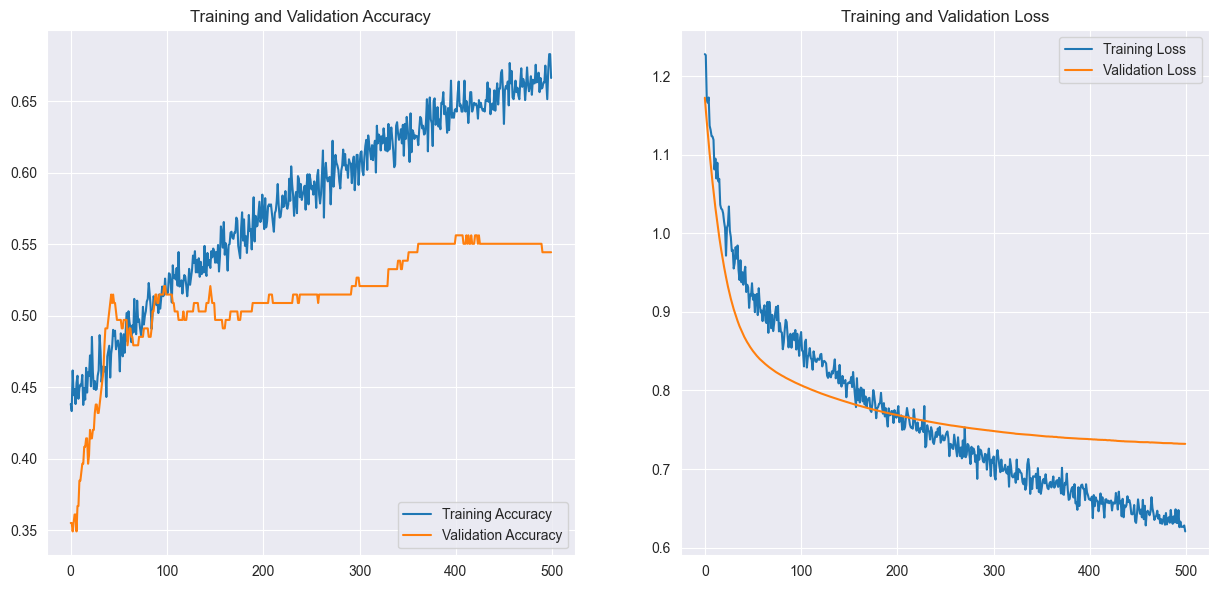

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
predict_x = model.predict(x_val) 
predictions = np.argmax(predict_x,axis=1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Sick (Class 0)','Healthy (Class 1)']))

6/6 [==============================] - 2s 270ms/step
                   precision    recall  f1-score   support

   Sick (Class 0)       0.61      0.78      0.68       106
Healthy (Class 1)       0.28      0.14      0.19        63

         accuracy                           0.54       169
        macro avg       0.44      0.46      0.44       169
     weighted avg       0.48      0.54      0.50       169



In [31]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (img_size, img_size, 3), include_top = False, weights = "imagenet")

In [32]:
base_model.trainable = False

In [50]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(2, activation="softmax")                                     
                                ])

In [53]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [54]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500
51/51 [==============================] - 18s 316ms/step - loss: 0.5263 - accuracy: 0.7367 - val_loss: 0.6935 - val_accuracy: 0.5917
Epoch 2/500
51/51 [==============================] - 17s 325ms/step - loss: 0.5101 - accuracy: 0.7361 - val_loss: 0.6935 - val_accuracy: 0.5858
Epoch 3/500
51/51 [==============================] - 17s 331ms/step - loss: 0.5180 - accuracy: 0.7460 - val_loss: 0.6934 - val_accuracy: 0.5858
Epoch 4/500
51/51 [==============================] - 17s 330ms/step - loss: 0.5242 - accuracy: 0.7386 - val_loss: 0.6935 - val_accuracy: 0.5858
Epoch 5/500
51/51 [==============================] - 16s 320ms/step - loss: 0.5195 - accuracy: 0.7367 - val_loss: 0.6935 - val_accuracy: 0.5858
Epoch 6/500
51/51 [==============================] - 16s 320ms/step - loss: 0.5167 - accuracy: 0.7398 - val_loss: 0.6935 - val_accuracy: 0.5858
Epoch 7/500
51/51 [==============================] - 17s 327ms/step - loss: 0.5285 - accuracy: 0.7472 - val_loss: 0.6937 - val_accuracy:

51/51 [==============================] - 19s 383ms/step - loss: 0.4336 - accuracy: 0.7917 - val_loss: 0.6989 - val_accuracy: 0.5799
Epoch 114/500
51/51 [==============================] - 19s 381ms/step - loss: 0.4418 - accuracy: 0.7930 - val_loss: 0.6993 - val_accuracy: 0.5799
Epoch 115/500
51/51 [==============================] - 20s 394ms/step - loss: 0.4291 - accuracy: 0.8059 - val_loss: 0.6993 - val_accuracy: 0.5799
Epoch 116/500
51/51 [==============================] - 20s 387ms/step - loss: 0.4444 - accuracy: 0.7892 - val_loss: 0.6992 - val_accuracy: 0.5799
Epoch 117/500
51/51 [==============================] - 21s 409ms/step - loss: 0.4350 - accuracy: 0.7998 - val_loss: 0.6987 - val_accuracy: 0.5799
Epoch 118/500
51/51 [==============================] - 20s 395ms/step - loss: 0.4461 - accuracy: 0.7868 - val_loss: 0.6988 - val_accuracy: 0.5799
Epoch 119/500
51/51 [==============================] - 20s 387ms/step - loss: 0.4355 - accuracy: 0.7824 - val_loss: 0.6997 - val_accuracy:

51/51 [==============================] - 20s 385ms/step - loss: 0.4032 - accuracy: 0.8152 - val_loss: 0.7073 - val_accuracy: 0.5917
Epoch 226/500
51/51 [==============================] - 20s 395ms/step - loss: 0.4001 - accuracy: 0.8164 - val_loss: 0.7074 - val_accuracy: 0.5917
Epoch 227/500
51/51 [==============================] - 20s 397ms/step - loss: 0.4002 - accuracy: 0.8115 - val_loss: 0.7075 - val_accuracy: 0.5917
Epoch 228/500
51/51 [==============================] - 20s 399ms/step - loss: 0.4045 - accuracy: 0.8140 - val_loss: 0.7079 - val_accuracy: 0.5917
Epoch 229/500
51/51 [==============================] - 20s 401ms/step - loss: 0.3996 - accuracy: 0.8232 - val_loss: 0.7091 - val_accuracy: 0.5917
Epoch 230/500
51/51 [==============================] - 21s 411ms/step - loss: 0.3886 - accuracy: 0.8263 - val_loss: 0.7090 - val_accuracy: 0.5917
Epoch 231/500
51/51 [==============================] - 21s 418ms/step - loss: 0.4028 - accuracy: 0.8158 - val_loss: 0.7076 - val_accuracy:

51/51 [==============================] - 22s 437ms/step - loss: 0.3771 - accuracy: 0.8276 - val_loss: 0.7173 - val_accuracy: 0.6154
Epoch 338/500
51/51 [==============================] - 22s 428ms/step - loss: 0.3800 - accuracy: 0.8313 - val_loss: 0.7159 - val_accuracy: 0.6036
Epoch 339/500
51/51 [==============================] - 22s 434ms/step - loss: 0.3790 - accuracy: 0.8307 - val_loss: 0.7163 - val_accuracy: 0.6036
Epoch 340/500
51/51 [==============================] - 22s 424ms/step - loss: 0.3745 - accuracy: 0.8245 - val_loss: 0.7163 - val_accuracy: 0.6036
Epoch 341/500
51/51 [==============================] - 21s 422ms/step - loss: 0.3716 - accuracy: 0.8307 - val_loss: 0.7166 - val_accuracy: 0.6036
Epoch 342/500
51/51 [==============================] - 21s 422ms/step - loss: 0.3666 - accuracy: 0.8344 - val_loss: 0.7175 - val_accuracy: 0.6154
Epoch 343/500
51/51 [==============================] - 22s 440ms/step - loss: 0.3755 - accuracy: 0.8344 - val_loss: 0.7162 - val_accuracy:

51/51 [==============================] - 22s 423ms/step - loss: 0.3531 - accuracy: 0.8405 - val_loss: 0.7262 - val_accuracy: 0.6272
Epoch 450/500
51/51 [==============================] - 21s 421ms/step - loss: 0.3515 - accuracy: 0.8418 - val_loss: 0.7253 - val_accuracy: 0.6272
Epoch 451/500
51/51 [==============================] - 21s 418ms/step - loss: 0.3598 - accuracy: 0.8461 - val_loss: 0.7258 - val_accuracy: 0.6272
Epoch 452/500
51/51 [==============================] - 21s 410ms/step - loss: 0.3556 - accuracy: 0.8461 - val_loss: 0.7251 - val_accuracy: 0.6331
Epoch 453/500
51/51 [==============================] - 21s 412ms/step - loss: 0.3598 - accuracy: 0.8368 - val_loss: 0.7247 - val_accuracy: 0.6272
Epoch 454/500
51/51 [==============================] - 21s 421ms/step - loss: 0.3442 - accuracy: 0.8449 - val_loss: 0.7249 - val_accuracy: 0.6272
Epoch 455/500
51/51 [==============================] - 22s 435ms/step - loss: 0.3566 - accuracy: 0.8443 - val_loss: 0.7260 - val_accuracy:

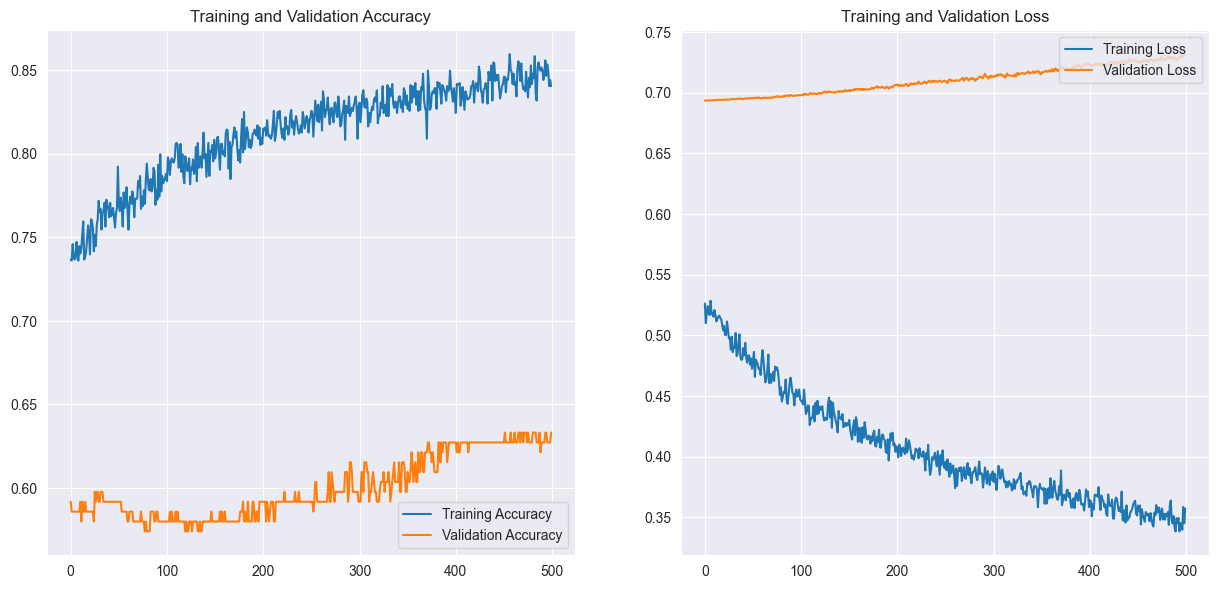

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [57]:
# predictions = model.predict_classes(x_val)
# predictions = predictions.reshape(1,-1)[0]
# print(classification_report(y_val, predictions, target_names = ['Sick (Class 0)','Healthy (Class 1)']))

In [1]:
# correct = 0
# for i in range(0,100):
#     idx2 = random.randint(0,len(x_val))
#     plt.imshow(x_val[idx2,:])
#     plt.show()

#     y_pred = model.predict(x_val[idx2,:].reshape(1,img_size,img_size,3))[0][0]
#     print("Actual: ",end='')
#     print("SICK" if y_val[idx2] == 0 else "HEALTHY",end=' | Prediction: ')
#     if y_pred > 0.5:
#         my_str = "{:.2f}".format((y_pred)*100)
#         print(f"SICK\nConfidence: {my_str}%")
#     else:
#         my_str = "{:.2f}".format((1-y_pred)*100)
#         print(f"HEALTHY\nConfidence: {my_str}%")
#     if y_pred > 0.5 and y_val[idx2] == 0:
#         correct += 1
# print("{:.2f}% correct!".format((correct)))

In [3]:
# SAVE THE MODEL TO JSON FILE

# json_model = model.to_json()

# with open('models/corn_ai.json','w') as json_file:
#     json_file.write(json_model)

# model.save_weights('models/corn_weights.h5')

In [ ]:
# LOAD THE MODEL FROM JSON FILE

# with open('models/corn_ai.json','r') as json_file:
    # json_savedModel = json_file.read()

# model_j = tf.keras.models.model_from_json(json_savedModel)
# model_j.summary()